In [2]:
%matplotlib inline 

## Относительная яркость свечения плазмы в трубке при различных давлениях 
Изображение это прямоугольная таблица имеющие некоторое количество строк и некоторое количество столцов и в каждой ячейке такой прямоугольной таблицы записано число которое коридует цвет в градиациях. Изображение распадается на квадратные области однородного цвета называемые пикселями (пересечения строк и столцов).
Для цветных изображений пиксель — это кортеж (R-Red, G-Green, B-Blue).

Яркость пикселя просто: I = (R + G + B) / 3. (В этой задачи мы делим ещё на 255 чтобы получить интервал значения от 0 до 1)

In [1]:
from skimage.io import imread, imshow, imsave
from PIL import Image
from scipy.interpolate import make_interp_spline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Исходные изображения будут иметь разные размеры и ориентацию. Во-первых, исправьте ориентацию изображения, чтобы источник света проецировался слева направо. Затем мы изменим размер изображений до того же размера, чтобы продолжить обработку изображения.

In [8]:
# Изменить размер изображения на 300х200, (300 –  ширина и 200 – высота)
img = Image.open('2.5Торр.jpg') #открыт изображение
width = 300
height = 200
resized_img = img.resize((width, height))
resized_img.save('new_images/image1.jpg') #сохранение новое изображение

In [12]:
img = imread('new_images/image.jpg')   # При Давлении Р = 1 Торр
img1 = imread('new_images/image1.jpg') # При Давлении Р = 2.5 Торр
img2 = imread('new_images/image2.jpg') # При Давлении Р = 5 Торр


In [13]:
img.shape

(200, 300, 3)

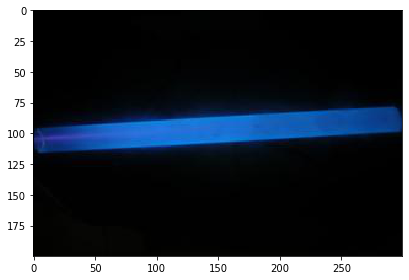

In [14]:
imshow(img)

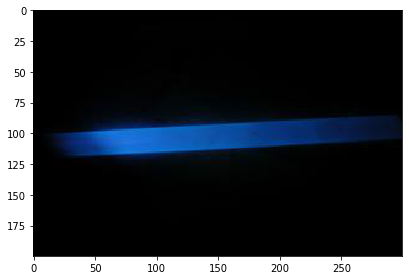

In [15]:
imshow(img1)

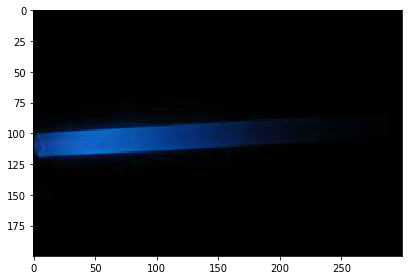

In [16]:
imshow(img2)

In [11]:
# Р = 1 Торр
img = Image.open("new_images/image.jpg")  # открыт изображение
pixels = img.load()  # выгружаем значения пикселей.

I = []  # создать список для записи значений яркости
y = 100 # выберите соответствующую координату y (вертикальную) в пределах диапазона координат трубы
for x in range(img.width): # Выгружаем значение каждого пикселя в порядке слева направо.
    r, g, b = pixels[x, y]
    pixels[x, y] = g, b, r
    i = (r+g+b)/(3) # яккость пикселя
    I.append(i)  # доьавить значение якость в исходный список

# I_new = [i/i_max for i in I]
X = [x for x in range(img.width)] # список,содержащий расстояния точек от начала трубки

X = np.array(X) # преобразовать список в массив
I_new = np.array(I)
I_new = I_new/np.max(I_new)


In [104]:
I_new[-1]

7.0

In [26]:
X = np.array([0, 50, 82, 100, 150, 200, 250]) 
Y = np.array([18.66666667, 107.66666667, 127.66666666666667, 122.66666667, 113.66666667,
       101.66666667,  89.66666667])

# Определить X как 200 равноотстоящих значений между минимальным и максимальным значением исходного X
X_new = np.linspace (X.min(), X.max(), 200) 
# Определить сплайн со степенью k=2
spl = make_interp_spline (X, Y, k = 3)
I_smooth = spl(X_new)
I_smooth = I_smooth/np.max(I_smooth)


In [161]:
I_new[::50]

array([ 18.66666667, 107.66666667, 122.66666667, 113.66666667,
       101.66666667,  89.66666667])

In [162]:
i_max = np.argmax(I_new)
i_max

82

In [12]:
# Р = 2.5 Торр
img1 = Image.open("new_images/image1.jpg")
pixels = img1.load()

I1 = []
y = 110 # выберите соответствующую координату y (вертикальную) в пределах диапазона координат трубы
for x in range(img1.width):
    r, g, b = pixels[x, y]
    pixels[x, y] = g, b, r
    i = (r+g+b)/(3)
    I1.append(i)
    
X = [x for x in range(img.width)] # список,содержащий расстояния точек от начала трубки
X = np.array(X) # преобразовать список в массив
I_new1 = np.array(I1)
I_new1 = I_new1/np.max(I_new1)



In [14]:
X1 = np.array([0, 50, 79, 100, 150, 200, 250]) 
Y1 = np.array([ 0.        ,  65.66666667, 117, 111.33333333,  94.33333333,
        28.66666667,   2.33333333])

# Определить X как 200 равноотстоящих значений между минимальным и максимальным значением исходного X
X_new1 = np.linspace (X1.min(), X1.max(), 200) 
# Определить сплайн со степенью k=2
spl = make_interp_spline (X1, Y1, k = 2)
I_smooth1 = spl(X_new1)
I_smooth1 = I_smooth1/np.max(I_smooth1)

In [13]:
# Р = 5 Торр
img2 = Image.open("new_images/image2.jpg")
pixels = img2.load()

I2 = []
y = 110 # выберите соответствующую координату y (вертикальную) в пределах диапазона координат трубы
for x in range(img2.width):
    r, g, b = pixels[x, y]
    pixels[x, y] = g, b, r
    i = (r+g+b)/(3)
    I2.append(i)

i_max = max(I2)
I_new2 = [i/i_max for i in I2]
X = [x for x in range(img.width)] # список,содержащий расстояния точек от начала трубки
X = np.array(X) # преобразовать список в массив
I_new2 = np.array(I2)
I_new2 = I_new2/np.max(I_new2)





In [23]:
X2 = np.array([0, 48, 50, 100, 150, 200, 250]) 
Y2 = np.array([40., 105.66666666666667, 105.66666667, 76., 43., 3., 0])

# Определить X как 200 равноотстоящих значений между минимальным и максимальным значением исходного X
X_new2 = np.linspace (X2.min(), X2.max(), 200) 
# Определить сплайн со степенью k=2
spl = make_interp_spline (X2, Y2, k = 2)
I_smooth2 = spl(X_new2)
I_smooth2 = I_smooth2/np.max(I_smooth2)

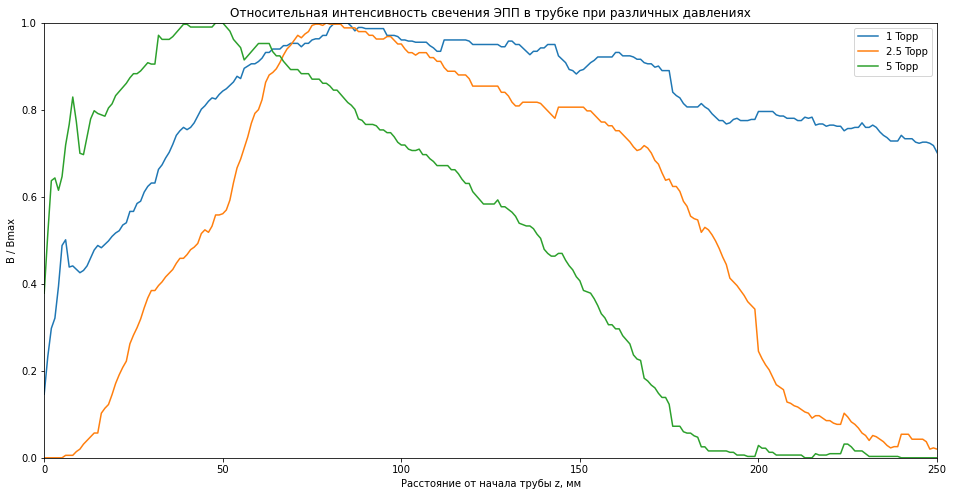

In [15]:
plt.figure(figsize = (16,8))
plt.title("Относительная интенсивность свечения ЭПП в трубке при различных давлениях")
plt.xlabel("Расстояние от начала трубы z, мм")
plt.ylabel("B / Bmax")
plt.plot(X, I_new, label="1 Topp")
plt.plot(X, I_new1, label="2.5 Topp");
plt.plot(X, I_new2, label="5 Topp");
plt.legend()
plt.axis([0,250,0,1]); 

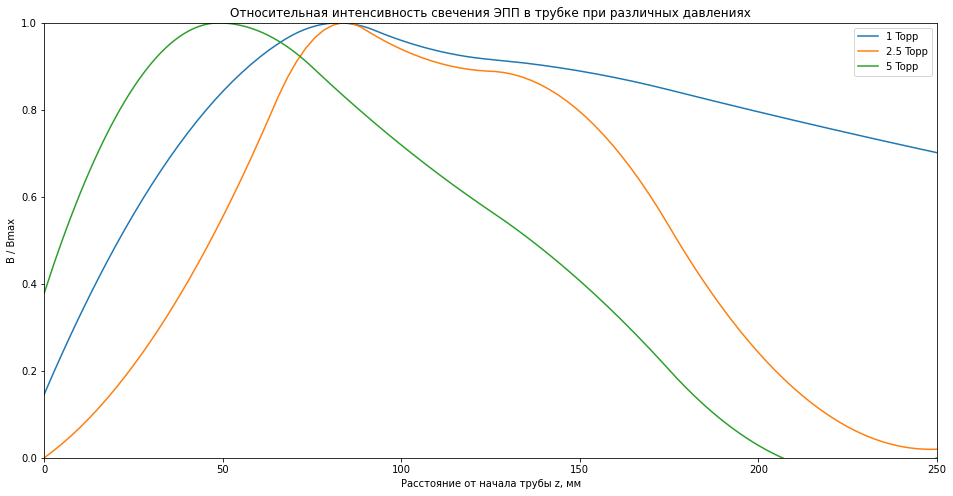

In [24]:
plt.figure(figsize = (16,8))
plt.title("Относительная интенсивность свечения ЭПП в трубке при различных давлениях")
plt.xlabel("Расстояние от начала трубы z, мм")
plt.ylabel("B / Bmax")
plt.plot(X_new, I_smooth, label="1 Topp")
plt.plot(X_new1, I_smooth1, label="2.5 Topp");
plt.plot(X_new2, I_smooth2, label="5 Topp");
plt.legend()
plt.axis([0,250,0,1]); 

## 15.02
### Исследование зависимости между интенсивностей оптического излучения и давлением в камере.  Продолжение обработки данных и построение график.

In [11]:
df = pd.read_excel('Lab.xlsx', sheet_name='Data') # open file excel
col_a = df['P_75'].values # read data

In [12]:
col_a

array([5.00014286, 5.00014286, 5.00014286, ..., 0.50014286, 0.50014286,
       0.50014286])

In [19]:
# z = 7.5cm (air)
df = pd.read_excel('Lab.xlsx', sheet_name='Data') # open file excel

P_1 = df['P_75'].values # read data
I_1 = df['B_75'].values

unique_P_1 = np.unique(P_1)   # Array of unique elements of P_1
mean_I_1 = [np.mean(I_1[P_1 == p]) for p in unique_P_1]
mean_I_1 = np.array(mean_I_1) 

i_max = np.max(mean_I_1)
I_1_new = np.array([i/i_max for i in mean_I_1])

# Graph smoothing
kernel = np.ones(2) / 2
I_smooth1 = np.convolve(mean_I_1, kernel, mode='same')
I_new_smooth1 = np.convolve(I_1_new, kernel, mode='same')

In [20]:
# z = 13cm (air)
df = pd.read_excel('Lab.xlsx', sheet_name='Data1')

P_2 = df['P_130'].values
I_2 = df['B_130'].values

unique_P_2 = np.unique(P_2)   # Array of unique elements of P_2
mean_I_2 = [np.mean(I_2[P_2 == p]) for p in unique_P_2]
mean_I_2 = np.array(mean_I_2)

i_max = np.max(mean_I_2)
I_2_new = np.array([i/i_max for i in mean_I_2])

kernel = np.ones(2) / 2

# Graph smoothing
I_smooth2 = np.convolve(mean_I_2, kernel, mode='same')
I_new_smooth2 = np.convolve(I_2_new, kernel, mode='same')

In [21]:
# z = 13cm (air)
df = pd.read_excel('Lab.xlsx', sheet_name='Data2')

P_3 = df['P_200'].values
I_3 = df['B_200'].values

unique_P_3 = np.unique(P_3)  # Array of unique elements of P_3
mean_I_3 = [np.mean(I_3[P_3 == p]) for p in unique_P_3]
mean_I_3 = np.array(mean_I_3)

i_max = np.max(mean_I_3)
I_3_new = np.array([i/i_max for i in mean_I_3])

kernel = np.ones(2) / 2

# Graph smoothing
I_smooth3 = np.convolve(mean_I_3, kernel, mode='same')
I_new_smooth3 = np.convolve(I_3_new, kernel, mode='same')

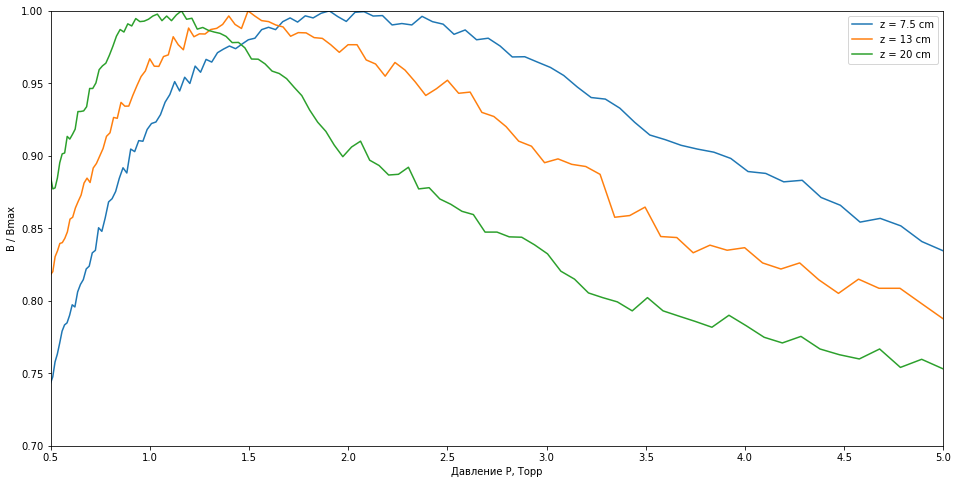

In [22]:
plt.figure(figsize = (16,8))
plt.xlabel("Давление P, Торр")
plt.ylabel("B / Bmax")
plt.plot(unique_P_1, I_1_new, label='z = 7.5 cm')
plt.plot(unique_P_2, I_2_new, label='z = 13 cm')
plt.plot(unique_P_3, I_3_new, label='z = 20 cm')
plt.axis([0.5,5,0.7,1]) 
plt.legend();

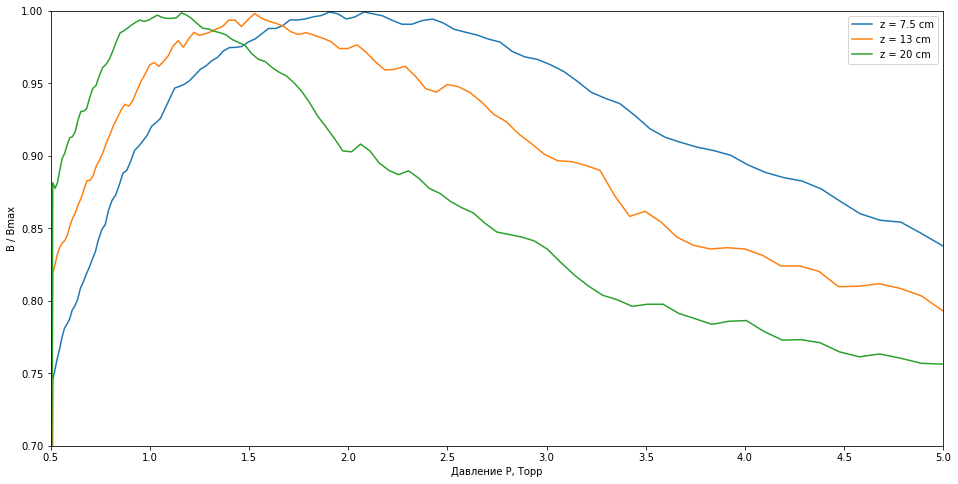

In [23]:
# Graph smoothing
plt.figure(figsize = (16,8))
plt.xlabel("Давление P, Торр")
plt.ylabel("B / Bmax")
plt.plot(unique_P_1, I_new_smooth1, label='z = 7.5 cm')
plt.plot(unique_P_2, I_new_smooth2, label='z = 13 cm')
plt.plot(unique_P_3, I_new_smooth3, label='z = 20 cm')
plt.axis([0.5,5,0.7,1]) 
plt.legend();